In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
df=pd.read_csv("testing1.csv")

In [7]:
df


,x1,x2,result
0,1,2,3
1,0,1,1
2,2,2,4
3,7,54,61
4,5,7,12
5,56,45,101
6,54,5,59
7,545,45,590
8,54,45,99
9,5,45,50


In [8]:
df.isnull()

,x1,x2,result
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [9]:
df.corr()

,x1,x2,result
x1,1.000000,0.123543,0.928957
x2,0.123543,1.000000,0.482119
result,0.928957,0.482119,1.000000


<AxesSubplot:>

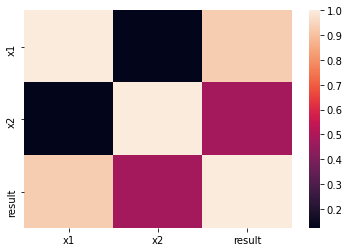

In [10]:
sn.heatmap(df.corr())

<AxesSubplot:>

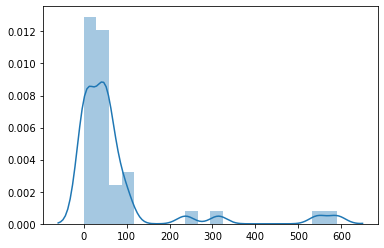

In [11]:
sn.distplot(df)

<AxesSubplot:xlabel='x1', ylabel='x2'>

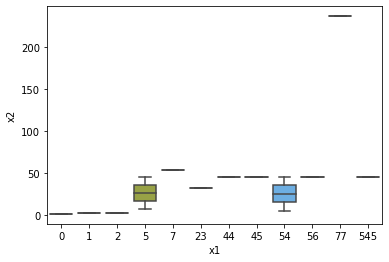

In [12]:
sn.boxplot(x="x1",y="x2",data=df)

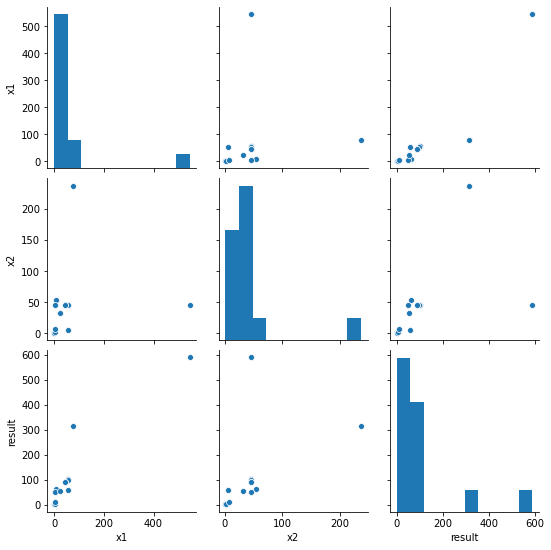

In [6]:
sn.pairplot(df)

In [13]:
x=df.iloc[:,:-1] #independentfeature
y=df.iloc[:,-1] #dependentfeature

In [14]:
x

,x1,x2
0,1,2
1,0,1
2,2,2
3,7,54
4,5,7
5,56,45
6,54,5
7,545,45
8,54,45
9,5,45


In [15]:
y


0       3
1       1
2       4
3      61
4      12
5     101
6      59
7     590
8      99
9      50
10     90
11     89
12     55
13    314
Name: result, dtype: int64

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [17]:
lr=LinearRegression()

In [18]:
mse=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=10)
mean_mse=np.mean(mse)

In [19]:
print(mean_mse)

-3.294599300862616e-27


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=.3,random_state=0)

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [23]:
l=Lasso()

In [24]:
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,0,1,3,10,25,50,70,100,120,150,160,175,200,250]}

In [25]:
msel=GridSearchCV(l,parameter,scoring='neg_mean_squared_error',cv=5)

In [26]:
msel.fit(xtrain,ytrain)

E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
E:\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
E:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:531: UserWarning: With alpha=0, this algorithm does n

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 0, 1,
                                   3, 10, 25, 50, 70, 100, 120, 150, 160, 175,
                                   200, 250]},
             scoring='neg_mean_squared_error')

In [27]:
msel.best_score_

-6.701309924044035e-05

In [28]:
msel.best_params_

{'alpha': 0.01}

In [29]:
predictionl=msel.predict(xtest)

<AxesSubplot:xlabel='result'>

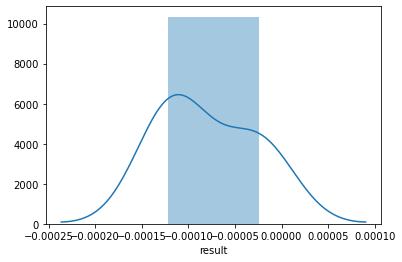

In [30]:
sn.distplot(ytest-predictionl)

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [32]:
rg=Ridge()

In [33]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1e-1,1,3,10,25,50,70,100,120,150,160,175,200,250]}

In [34]:
mser=GridSearchCV(rg,parameters,scoring='neg_mean_squared_error',cv=10)

In [35]:
mser.fit(x,y)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 1, 3,
                                   10, 25, 50, 70, 100, 120, 150, 160, 175, 200,
                                   250]},
             scoring='neg_mean_squared_error')

In [36]:
mser.best_score_

-1.2540995126841558e-26

In [37]:
pedictionr=mser.predict(xtest)

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

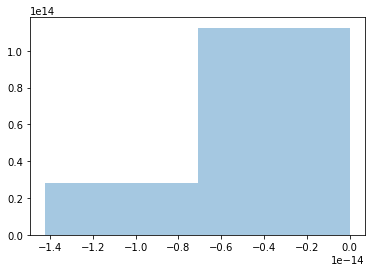

In [38]:
sn.distplot(ytest-pedictionr)

In [ ]:
plt.scatter(ytest,predictionl)

In [ ]:
import pickle

In [35]:
from sklearn import tree

In [36]:
cl=tree.DecisionTreeClassifier()

In [37]:
cl.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [42]:
decpred=cl.predict(xtest)

In [39]:
print(decpred)

[101   3   3  90   3]


<AxesSubplot:xlabel='result'>

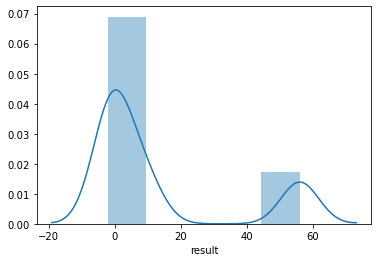

In [40]:
sn.distplot(ytest-decpred)

In [45]:
from sklearn import metrics

In [56]:
dp

array([99, 59, 12, 89,  4], dtype=int64)

In [53]:
decpred

array([101,   3,   3,  90,   3], dtype=int64)

In [61]:
print('MAE:', metrics.mean_absolute_error(ytest, decpred))
print('MSE:', metrics.mean_squared_error(ytest, decpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest,decpred)))

MAE: 13.8
MSE: 644.6
RMSE: 25.388973984783238


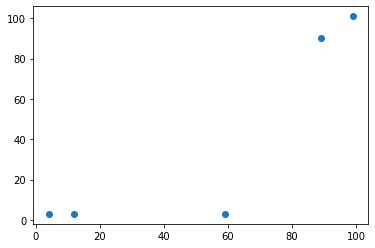

In [62]:
plt.scatter(ytest,decpred)

In [68]:
# open a file, where you ant to store the data
file = open('testt2.pkl', 'wb')


# dump information to that file
pickle.dump(cl, file)

<IPython.core.display.Javascript object>

In [71]:
dii=pd.read_pickle('testt2.pkl') 

In [72]:
dii

DecisionTreeClassifier()

In [74]:
di=pd.read_pickle('testingss.pkl')

In [75]:
di

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.1, 0, 1,
                                   3, 10, 25, 50, 70, 100, 120, 150, 160, 175,
                                   200, 250]},
             scoring='neg_mean_squared_error')

In [81]:
# open a file, where you ant to store the data
file = open('testt3.pkl', 'wb')


# dump information to that file
pickle.dump(decpred,file)


<IPython.core.display.Javascript object>

In [82]:
di1=pd.read_pickle('testt3.pkl')

In [83]:
di1

'decpred.pkl'

In [84]:
file = open('testt4.pkl', 'wb')


# dump information to that file
pickle.dump(decpred,file)

<IPython.core.display.Javascript object>

In [85]:
d=pd.read_pickle('testt4.pkl')

EOFError: Ran out of input

In [2]:
from sklearn.linear_model import LogisticRegression

E:\anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.30, 
                                                    random_state=42)

In [17]:
l=LogisticRegression()

In [18]:
l.fit(xtrain,ytrain)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [19]:
pred=l.predict(xtest)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
accuracy=confusion_matrix(ytest,pred)

In [22]:
accuracy


array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

<AxesSubplot:xlabel='result'>

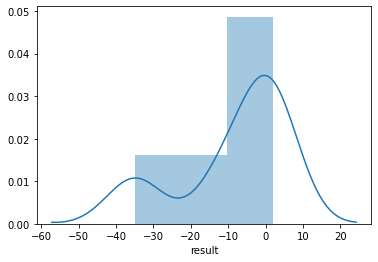

In [23]:
sn.distplot(ytest-pred)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0
          50       0.00      0.00      0.00       1.0
          55       0.00      0.00      0.00       1.0
          61       0.00      0.00      0.00       0.0
          89       0.00      0.00      0.00       1.0
          90       0.00      0.00      0.00       0.0
          99       0.00      0.00      0.00       0.0
         101       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


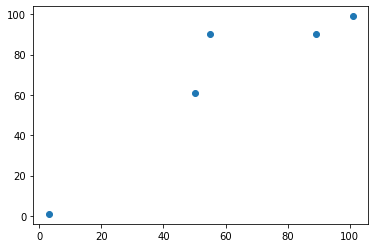

In [25]:
plt.scatter(ytest,pred)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy=accuracy_score(ytest,pred)
accuracy

0.0

In [29]:
# open a file, where you ant to store the data
file = open('testlog.pkl', 'wb')


# dump information to that file
pickle.dump(l, file)

<IPython.core.display.Javascript object>

In [39]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(xtrain,ytrain)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [41]:
rf_random.best_score_

-23306.432182

In [42]:
predictions=rf_random.predict(xtest)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='result'>

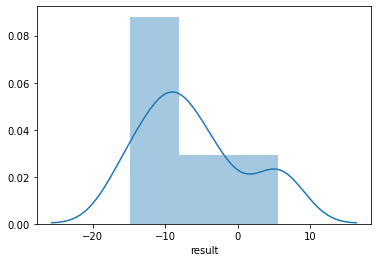

In [43]:
sns.distplot(ytest-predictions)

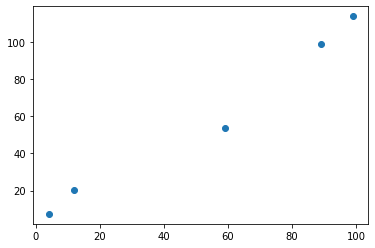

In [44]:
plt.scatter(ytest,predictions)

In [45]:
from sklearn import metrics

In [48]:
print('MAE:', metrics.mean_absolute_error(ytest, pred))
print('MSE:', metrics.mean_squared_error(ytest, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(ytest, pred)))

NameError: name 'pred' is not defined